In [14]:
## load dependencies
import smogn
import pandas
import seaborn
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [76]:
## load data
N33H = pandas.read_excel(
    
    ## http://jse.amstat.org/v19n3/decock.pdf
    ##"https://raw.githubusercontent.com/nickkunz/smogn/master/data/housing.csv"
    "data/N33H - time.xlsx", header=1
)
del N33H['Unnamed: 4']
## conduct smogn
N33H_smogn = smogn.smoter(
    
    data = N33H.truncate(after='64',axis=0), 
    y = "감자율"
)

r_index: 100%|##########################################################################| 3/3 [00:00<00:00, 599.53it/s]


In [45]:
## dimensions - original data 
N33H.shape

(80, 4)

In [46]:
N33H

,Pc,온도,시간,감자율
0,2.03,140,0.5,0.98088
1,2.03,160,0.5,0.90991
2,2.03,180,0.5,0.77368
3,2.03,200,0.5,0.60988
4,3.26,140,0.5,0.99062
...,...,...,...,...
75,4.81,200,144.0,0.75330
76,6.69,140,144.0,0.99606
77,6.69,160,144.0,0.97627
78,6.69,180,144.0,0.94345


In [47]:
## dimensions - modified data
N33H_smogn.shape

(50, 4)

In [48]:
N33H_smogn
#N33H_smogn.set_option('display.max_seq_items', None)
#N33H_smogn

,Pc,온도,시간,감자율
2,2.030000,180,0.500000,0.773680
3,2.030000,200,0.500000,0.609880
4,3.260000,140,0.500000,0.990620
5,3.260000,160,0.500000,0.966550
7,3.260000,200,0.500000,0.754230
9,4.810000,160,0.500000,0.976210
11,4.810000,200,0.500000,0.829230
14,6.690000,180,0.500000,0.960540
16,2.030000,140,1.500000,0.975420
17,2.030000,180,1.500000,0.741200


In [49]:
## box plot stats - original data 
smogn.box_plot_stats(N33H['감자율'])['stats']

array([0.60988 , 0.82256 , 0.941445, 0.97803 , 0.99688 ])

In [50]:
## box plot stats - modified data
smogn.box_plot_stats(N33H_smogn['감자율'])['stats']

array([0.53863   , 0.69613684, 0.74816978, 0.925125  , 0.99205   ])

<AxesSubplot:xlabel='감자율', ylabel='Density'>

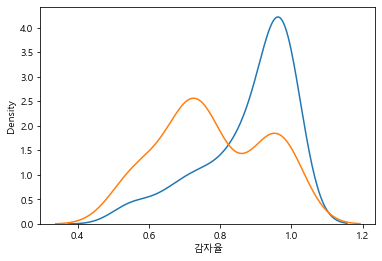

In [51]:
## plot y distribution 
seaborn.kdeplot(N33H['감자율'], label = "Original")
seaborn.kdeplot(N33H_smogn['감자율'], label = "Modified")

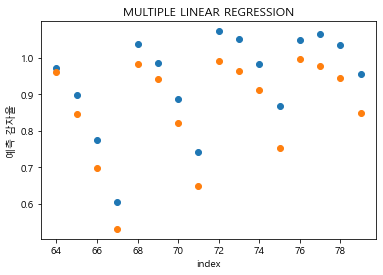

변환 차수 :  2
train cv10 R2:[0.93621597 0.89247975 0.98136898 0.92957285 0.99064887 0.98013377
 0.96911241 0.9647772  0.70494506 0.78712859]
train cv10 평균점수 : 0.9136383443028974
test set R2:  0.6747431957130727
회귀계수:  [[ 0.00000000e+00 -4.23428849e-02  1.18686107e-02 -2.34345330e-03
  -1.03216356e-02  9.75035883e-04  8.57940725e-05 -5.96956691e-05
   2.27687632e-06  1.25876963e-05]]


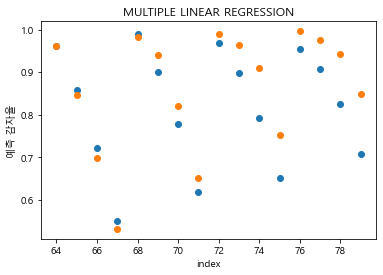

변환 차수 :  3
train cv10 R2:[ 6.12485798e-01  7.78216589e-01  9.64431089e-01  1.90219139e-01
  9.44165859e-01  8.83529898e-01  8.23353197e-01  7.94824923e-01
 -2.97774543e+03  6.28728779e-01]
train cv10 평균점수 : -297.1125476043789
test set R2:  0.7422315620905688
회귀계수:  [[ 0.00000000e+00  1.17957526e-01  5.56758669e-03 -2.77973911e-03
  -5.37057222e-02  1.07228670e-03  4.53796980e-04 -2.47095708e-05
  -2.37310280e-05  7.42146098e-05  3.21231219e-03  8.48454435e-06
   4.88196283e-05 -3.95066066e-07 -2.95121594e-06 -3.45931179e-06
  -6.23634866e-08  1.02388646e-07 -5.95744897e-08 -2.30012926e-07]]


C:\Users\SIMBA\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SIMBA\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


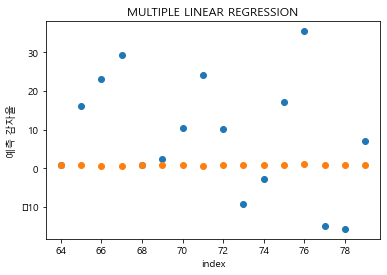

C:\Users\SIMBA\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


변환 차수 :  4
train cv10 R2:[-7.71200877e+03 -6.83239067e+01  9.54007289e-01 -9.67305749e+06
 -9.59436140e+03 -9.69809333e+01 -4.76286653e+03 -1.92116986e+06
 -4.02763015e+03  6.97762087e-01]
train cv10 평균점수 : -1162048.7873251725
test set R2:  -15190.777326448588
회귀계수:  [[ 1.27144462e+02  7.59707417e+02  1.47800298e+02 -6.18665319e+00
  -5.28898962e-01 -1.34873248e+01  2.19864867e+00 -1.17859828e+00
   5.56715278e-02  2.59438969e-02  4.59668103e-01 -2.43501657e-02
   5.56049356e-02  7.94306236e-02 -2.44202635e-02 -3.17778166e-03
   4.10726768e-03 -6.89307257e-05 -1.90433224e-04 -8.90794455e-05
  -2.61969439e-02 -7.38607537e-05 -2.39686173e-04  6.79178699e-05
  -2.60943739e-04 -1.20288839e-05 -1.54078067e-04  6.66152631e-05
   1.80114534e-05 -3.55293615e-06 -5.27635245e-06 -2.74329409e-07
   3.38309860e-07  2.59812229e-07  2.79689516e-07]]


C:\Users\SIMBA\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


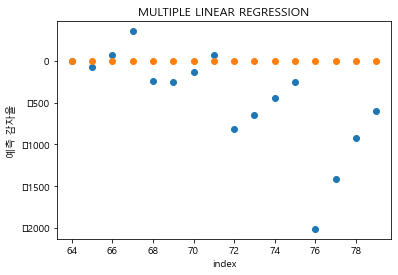

변환 차수 :  5
train cv10 R2:[-3.28378138e+02 -1.15944437e+03  8.84591122e-01 -2.11143635e+04
 -1.45693424e+03 -1.13807613e+06 -4.19391639e+05 -6.58638051e+06
 -2.56629012e+05 -4.63932211e+00]
train cv10 평균점수 : -842454.0167224059
test set R2:  -30398770.409704886
회귀계수:  [[ 4.61081417e-05  7.11499950e-05 -3.78310017e-04 -1.26956652e-05
   1.49887951e-03  2.75554485e-03 -4.51621217e-04 -3.23289053e-02
  -3.43382345e-04 -2.60040307e-03  6.26993042e-03  7.93737658e-02
  -2.28189227e-04 -2.83022061e-03 -2.31632829e-02 -2.03814773e-02
   3.81143214e-04  1.18072293e-03 -5.07504828e-03  7.45176856e-03
   9.51804223e-03 -5.59959415e-03 -1.12097444e-02 -4.80058241e-04
   3.77490434e-03 -1.52263109e-02  2.20466830e-05  1.15125752e-04
   8.42888183e-04  1.32827367e-04 -1.66514459e-06 -1.14593775e-05
   4.82020428e-05 -7.44197913e-05 -1.22618693e-05 -4.23670996e-02
   5.10260031e-03 -2.61043349e-03 -2.11334810e-04  2.69534431e-04
   3.81197279e-05  5.67934714e-06 -2.48310265e-05  7.16861574e-05
   5.09

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')


x = N33H[['Pc', '온도', '시간']]
y = N33H[['감자율']]

x_smogn = N33H_smogn[['Pc', '온도', '시간']]
y_smogn = N33H_smogn[['감자율']]

def prediction(hyper_degree):
    # 데이터셋 분리
    x_train, _, y_train, _ = train_test_split(x_smogn, y_smogn, train_size=0.8, test_size=0.2, shuffle=False) #smogn 데이터로 학습
    _, x_test, _, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, shuffle=False) #144 예측
    #모델 생성
    model = LinearRegression()

    poly = PolynomialFeatures(degree = hyper_degree) # n차함수 적용
    x_train_poly = poly.fit_transform(x_train) # 데이터를 n차식으로 변형
    x_test_poly = poly.fit_transform(x_test) # 데이터를 n차식으로 변형
    model.fit(x_train_poly, y_train) # model fitting
    
    # K-fold model validation
    arr_score = cross_val_score(model,x_train_poly,y_train,scoring='r2',cv=10)
    
    
    #예측 비교
    y_predict = model.predict(x_test_poly)
    plt.scatter(y_test.index, y_predict)
    plt.scatter(y_test.index, y_test)
    plt.xlabel("index")
    plt.ylabel("예측 감자율")
    plt.title("MULTIPLE LINEAR REGRESSION")
    plt.show()
    
    # test k-fold
    #test_score = cross_val_score(model,x_test_poly, y_test,scoring='r2',cv=5)
    
    print('변환 차수 : ', hyper_degree)
    print(f"train cv10 R2:{arr_score}")
    print(f'train cv10 평균점수 : {arr_score.mean()}')
    #print(f'test cv5 R2: , {test_score}')
    #print(f'test cv5 평균점수: , {test_score.mean()}')
    print("test set R2: ", model.score(x_test_poly, y_test))
    print("회귀계수: ", model.coef_)
    

# 2차항 부터 10차항 까지 출력
for i in range(2,6):
    prediction(i)
#prediction(2)

변환 차수 :  2

train cv10 R2:[0.93902697 0.98181308 0.9888281  0.98511989 0.99272885 0.98435874
 0.94021461 0.94586292 0.55561959 0.1968244 ]
 
train cv10 평균점수 : 0.8510397147952238

test set R2:  0.747539884733013

회귀계수:  [[ 0.00000000e+00 -6.99970008e-02  1.15702171e-02 -9.24408860e-05
  -8.44446071e-03  1.02422794e-03  1.98517666e-04 -5.80736238e-05
  -1.00742846e-05  8.20520392e-06]]

변환 차수 :  2

train cv10 R2:[ 0.96883344  0.76904547  0.98178657  0.99776899  0.97876112  0.98206659
  0.98160373  0.99126804  0.58257587 -0.302065  ]
  
train cv10 평균점수 : 0.7931644815161644

test set R2:  0.8327384806884093

회귀계수:  [[ 0.00000000e+00 -7.18260866e-02  1.40671612e-02 -6.50170958e-04
  -8.66535018e-03  1.03289094e-03  1.56824200e-04 -6.55116319e-05
  -6.88416890e-06  9.16936363e-06]]

변환 차수 :  2

train cv10 R2:[0.94314702 0.86974588 0.98337486 0.99840291 0.96963813 0.96924082
 0.89050382 0.96364841 0.96049846 0.32138579]
 
train cv10 평균점수 : 0.8869586082006353

test set R2:  0.8887917648789255

회귀계수:  [[ 0.00000000e+00 -6.57717149e-02  1.23735773e-02 -5.15175866e-04
  -7.68672656e-03  9.91450925e-04  9.97923099e-05 -6.03049483e-05
  -7.80852567e-06  9.78647117e-06]]